<a href="https://colab.research.google.com/github/jcandane/Lightfield/blob/main/EMfield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#plt.style.use("dark_background")

np.set_printoptions(precision=4, linewidth=200, threshold=2000, suppress=True)

In [13]:
class light_field(object):
    ''' A class of Electric Field Pulses '''
    def __init__(self, helicity=[1.0, 0.0, 0.0], ω=0., E0=1., dt=0.01, T=10, Γ=np.inf, t0=0., phase=0.):
        self.helicity = np.asarray(helicity)
        self.ω = ω
        self.Γ = Γ
        self.phase = phase
        self.t0 = t0
        self.E0 = E0

        π = np.pi

        self.dt = dt
        self.T  = T
        self.dω = 2*π / (self.T-self.dt)
        self.Ω  = π / self.dt

        self.timefield = np.arange(0., self.T, self.dt)
        self.freqfield = np.linspace(-self.Ω, self.Ω, len(self.timefield), endpoint=True)
        self.freqline  = np.arange(-self.Ω, self.Ω+self.dω, self.dω)

        E_t = self.E0 * np.exp( - 4*np.log(2) * (self.timefield - self.t0)**2/(self.Γ**2) - 1j * self.ω * (self.timefield - self.t0) + 1j * self.phase )
        E_ω = self.E0 * self.Γ / (np.sqrt( 8*np.log(2) )) * np.exp( - ( self.Γ**2 * (self.ω - self.freqfield)**2 )/( 16*np.log(2) ) + 1j * (self.phase + self.freqfield * self.t0) )
        B_t = None ## fill in!!!

        self.E_tx      = E_t[:,None] * self.helicity[None,:]
        self.E_ωx      = E_ω[:,None] * self.helicity[None,:]
        self.B_tx      = None
        self.B_ωx      = None        
        self.F_tuv     = None
        self.F_ωuv     = None
        
    def getE(self, get_Real=True):
        """ Scalar E-field for a given time/instant t """
        E_t = self.E0 * np.exp( - 4*np.log(2) * (self.timefield - self.t0)**2/(self.Γ**2) - 1j * self.ω * (self.timefield - self.t0) + 1j * self.phase )
        self.E_tx = E_t[:,None] * self.helicity[None,:]
        if get_Real:
            return (E_t).real
        else:
            return self.E_t
    
    def getEω(self, ω):
        """ Analytic Fourier Transform for Gaussian Wavepacket """
        self.E_ω = self.E0 * self.Γ / (np.sqrt( 8*np.log(2) )) * np.exp( - ( self.Γ**2 * (self.ω - ω)**2 )/( 16*np.log(2) ) ) * np.exp( 1j * (self.phase + ω * self.t0) )
        return self.E_ω
    
    def get_freq(self, timeline, AngularFreq=True):
        """ given timeline (time-array) get corresponding frequency array for FFT """
        T  = timeline[-1]
        dt = timeline[1] - timeline[0]
        f  = np.arange(0.,1/dt + 1/T, 1/T)[:int(len(timeline)/2)]
        
        if AngularFreq:
            self.freqspace = 2*np.pi*f
            return 2*np.pi*f
        else:
            self.freqspace = f
            return f

    def FFT_1D(self, A_t):
        return (np.fft.fft(  A_t  ))[:int(len(A_t)/2)] / np.pi
    
    def get_all(self, t):
        self.getE(t)
        self.get_freq(t)
        self.getEω(self.freqspace)
        return None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


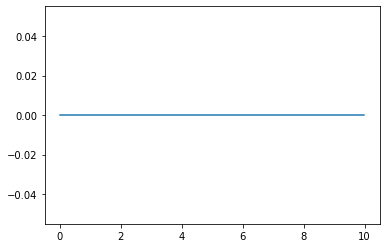

In [16]:
field3    = light_field()
field3.dt = 0.01
field3.T  = 10.0
field3.E0 = 1e-1
field3.ω  = 1
#field3.Γ  = 10.
field3.helicity = np.array([1.,0.,0.])

#plt.plot(field3.timefield, field3.getE())
plt.plot(field3.timefield, field3.E_tx[:,2].real)
plt.show()

In [4]:
print( field3.freqfield.shape )
print( field3.freqline.shape )
print( field3.timefield.shape )

(1000,)
(1001,)
(1000,)


In [5]:
print(field3.freqfield[0])
print(field3.freqfield[-1])
print(field3.freqline[0])
print(field3.freqline[-1])

-314.1592653589793
314.1592653589793
-314.1592653589793
314.7882128371737


In [6]:
print(field3.dω)
print(-field3.freqline[0] + field3.freqline[1])

0.6289474781961548
0.628947478196153


In [7]:
k = np.array([1.,0.,0.])

def rotation_matrix(θ):

    θ *= np.pi/180 ## degrees to radians
    R_yz = np.array([[1.,        0.,         0.], 
                     [0., np.cos(θ), -np.sin(θ)], 
                     [0., np.sin(θ), np.cos(θ)]])
    R_xz = np.array([[ np.cos(θ), 0., np.sin(θ)], 
                     [        0., 1.,        0.], 
                     [-np.sin(θ), 0., np.cos(θ)]])
    R_xy = np.array([[np.cos(θ), -np.sin(θ), 0.], 
                     [np.sin(θ),  np.cos(θ), 0.], 
                     [0.       ,         0., 1.]])

    return np.asarray([R_yz, R_xz, R_xy])

np.einsum("xyz, z -> xy", rotation_matrix(90), k) 

array([[ 1.,  0.,  0.],
       [ 0.,  0., -1.],
       [ 0.,  1.,  0.]])

In [22]:
basis

array([[ 0., -1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

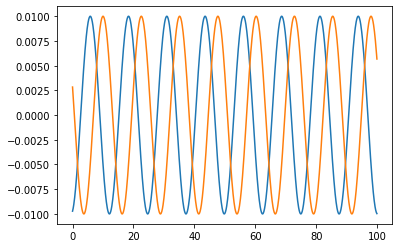

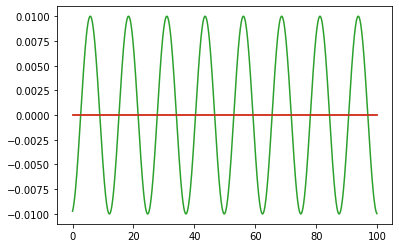

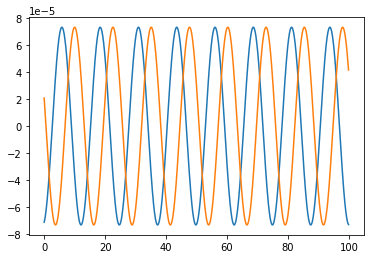

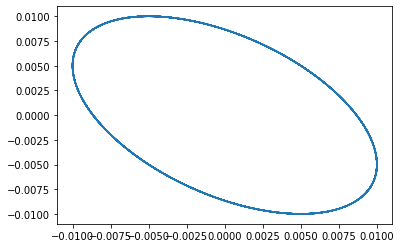

In [26]:
c = 137
π = np.pi

dt = 0.1
T  = 100
dω = 2*π / (T-dt)
Ω  = π / dt

timefield = np.arange(0, T, dt)
time = np.arange(0., T, dt)
freq = np.arange(-Ω, Ω + dω, dω)

### inputs
w     = 0.5     ## freq of mono. light
Γ     = np.inf  ## pulse temporal-width
t0    = 10.     ## temporal offset
E_u0  = 1e-2    ##   up-E-field intensity
E_d0  = 1e-2    ## down-E-field intensity
ϕ_u   = np.pi/3 ##   up-phase 
ϕ_d   = 0.      ## down-phase 
k     = np.array([0.,0.,1.]) ## wave-vector

basis    = np.einsum("xyz, z -> xy", rotation_matrix(90), k)
subbasis = np.where( np.sum( np.abs( basis - k[None, :] ), axis=1) != 0)[0]
Eu_t =  E_u0 * np.exp( - 4*np.log(2) * (timefield - t0)**2/(Γ**2) - 1j * w * (timefield - t0) + 1j * ϕ_u )[:, None] * basis[None, subbasis[0]]
Bu_t = -E_u0 * np.exp( - 4*np.log(2) * (timefield - t0)**2/(Γ**2) - 1j * w * (timefield - t0) + 1j * ϕ_u )[:, None] * basis[None, subbasis[1]] / c
Ed_t =  E_d0 * np.exp( - 4*np.log(2) * (timefield - t0)**2/(Γ**2) - 1j * w * (timefield - t0) + 1j * ϕ_d )[:, None] * basis[None, subbasis[1]]
Bd_t = -E_d0 * np.exp( - 4*np.log(2) * (timefield - t0)**2/(Γ**2) - 1j * w * (timefield - t0) + 1j * ϕ_d )[:, None] * basis[None, subbasis[0]] / c

Fu_t = np.zeros( (len(timefield), 4,4) , dtype=np.complex128)
Fu_t[:,0,1:4] = -Eu_t
Fu_t[:,1,2]   = -Bu_t[:,2]
Fu_t[:,1,3]   =  Bu_t[:,1]
Fu_t[:,2,3]   = -Bu_t[:,0]
Fu_t += -Fu_t.swapaxes(1,2)

#plt.plot(Eu_t.real, Ed_t.real)
plt.plot(timefield, Eu_t.real[:,1])
plt.plot(timefield, Ed_t.real[:,0])
#plt.plot(timefield, Ed_t.real)
plt.show()

plt.plot(timefield, -Fu_t[:,0].real)
plt.show()

plt.plot(timefield, Bu_t.real[:,0])
plt.plot(timefield, Bd_t.real[:,1])
#plt.plot(timefield, Ed_t.real)
plt.show()

plt.plot(Eu_t.real[:,1], Ed_t.real[:,0])
plt.show()

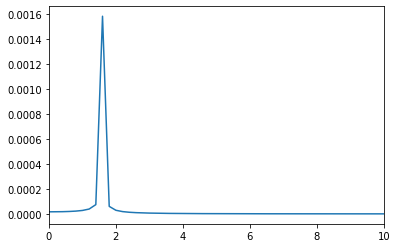

(0.07413411444760087+0.006753594624633355j)

In [59]:
X = Eu_t.real[:,1]
values = np.arange(0, int(len(X)/2), 1)
af = 2 * values * Ω / (len(X))

fft_Eu = -(np.fft.fft(  Eu_t.real[:,1]  )) / π ##[:int(len(A_t)/2)]
plt.plot(af, np.abs(fft_Eu)[:int(len(X)/2)]/len(fft_Eu))
plt.xlim([0, 10])
plt.show()

np.amax((np.fft.fft(  Eu_t.real[:,1]  )))/ π

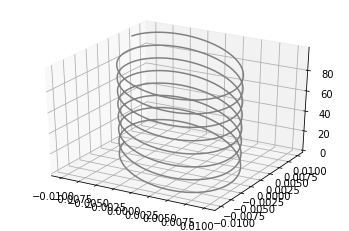

In [19]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = timefield
xline = Eu_t.real[:,1]
yline = Ed_t.real[:,0]
ax.plot3D(xline, yline, zline, 'gray')
fig.show()

In [10]:
Fu_t[150]

array([[ 0.   +0.j    , -0.   -0.j    ,  0.006-0.008j , -0.   +0.j    ],
       [ 0.   +0.j    ,  0.   +0.j    ,  0.   -0.j    ,  0.   +0.j    ],
       [-0.006+0.008j , -0.   +0.j    ,  0.   +0.j    ,  0.   -0.0001j],
       [ 0.   -0.j    ,  0.   +0.j    , -0.   +0.0001j,  0.   +0.j    ]])

# Fourier Transforms Domain

In [11]:
π = np.pi

dt = 0.1
T  = 10
dω = 2*π / (T-dt)
Ω  = π / dt

time = np.arange(0., T, dt)
freq = np.arange(-Ω, Ω + dω, dω)

print(time.shape)
print(freq.shape)
print( freq[0] )
print( freq[-1] )

(100,)
(100,)
-31.41592653589793
31.415926535898052


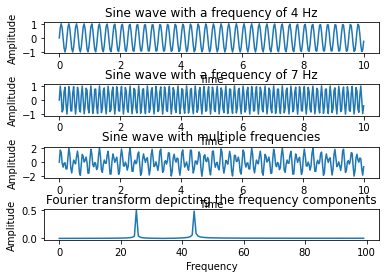

In [49]:

# Python example - Fourier transform using numpy.fft method

import numpy as np
import matplotlib.pyplot as plotter

# How many time points are needed i,e., Sampling Frequency
Ω   = 100

# At what intervals time points are sampled
dt       = π / Ω
### dt = π / Ω

# Begin time period of the signals
beginTime           = 0;

# End time period of the signals
T             = 10

# Frequency of the signals
w1     = 4;
w2     = 7;

# Time points
time        = np.arange(0, T, dt);

# Create two sine waves
amplitude1 = np.sin(2*π*w1*time)
amplitude2 = np.sin(2*π*w2*time)

# Create subplot
figure, axis = plotter.subplots(4, 1)
plotter.subplots_adjust(hspace=1)
# Time domain representation for sine wave 1
axis[0].set_title('Sine wave with a frequency of 4 Hz')
axis[0].plot(time, amplitude1)
axis[0].set_xlabel('Time')
axis[0].set_ylabel('Amplitude')
# Time domain representation for sine wave 2
axis[1].set_title('Sine wave with a frequency of 7 Hz')
axis[1].plot(time, amplitude2)
axis[1].set_xlabel('Time')
axis[1].set_ylabel('Amplitude')
# Add the sine waves
X = amplitude1 + amplitude2
# Time domain representation of the resultant sine wave
axis[2].set_title('Sine wave with multiple frequencies')
axis[2].plot(time, X)
axis[2].set_xlabel('Time')
axis[2].set_ylabel('Amplitude')

# Frequency domain representation

fourierTransform = np.fft.fft(X)/len(X)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(X)/2))] # Exclude sampling frequency

values      = np.arange(0, int(len(X)/2), 1)
timePeriod  = π * len(X) / Ω
frequencies = values/timePeriod

f  = values * Ω / (π * len(X))  ## values/timePeriod
af = 2 * values * Ω / (len(X))  ## values/timePeriod

# Frequency domain representation
axis[3].set_title('Fourier transform depicting the frequency components')
axis[3].plot(af, abs(fourierTransform))  ## frequencies
axis[3].set_xlabel('Frequency')
axis[3].set_ylabel('Amplitude')
plotter.show()

In [46]:
values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158])